**Part 0: Project Repository Structure**
--

This notebook contains our complete Phase 2 submission, including the markdown short-answer questions, data, and evaluation code.
In addition to this notebook, our repository contains 3 folders: 
- **prompts -** contains the the original BOLD prompts
- **generated_data -** contains the responses to the prompts generated by each model we tested.
- **model generation scripts -** contains 3 Jupyter Notebooks used to prompt GPT3, Llama2, and Mistral7B. We decided to keep these scripts separate from this main notebook since they require a GPU to run and are very slow.

**Part 1: Data Imports & Cleaning**
--

**a)** Below is the code to import datasets across 5 sensitive features (gender, political ideology, profession, race, and religious ideology) from AlexaAI's Bias in Open-ended Language Generation Dataset (BOLD). This dataset was initially downloaded from Hugging Face as 5 .json files, and is read in below. 

To clean this data, the team randomly sampled 10 prompts from two categories for each sensitive feature to compare. These binary categories are:

- Gender - Male vs Female
- Political Ideology - Left-Wing vs Right-Wing
- Profession - Corporate Roles vs Industrial Roles
- Race - African vs European Americans
- Religion - Christianity vs Buddhism

Dataset Source: https://huggingface.co/datasets/AlexaAI/bold

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the JSON files into pandas DataFrames
gender_prompts = pd.read_json('data/gender_prompt_wiki.json', lines=True)
politics_prompts = pd.read_json('data/political_ideology_prompt_wiki.json', lines=True)
profession_prompts = pd.read_json('data/profession_prompt_wiki.json', lines=True)
race_prompts = pd.read_json('data/race_prompt_wiki.json', lines=True)
religion_prompts = pd.read_json('data/religious_ideology_prompt_wiki.json', lines=True)

In [11]:
# Get binary subsets from each sensitive feature
male = gender_prompts[gender_prompts['category'] == 'American_actors'].sample(n=10)
female = gender_prompts[gender_prompts['category'] == 'American_actresses'].sample(n=10)
gender_prompts = pd.concat([male, female])

left = politics_prompts[politics_prompts['category'] == 'left-wing'].sample(n=10)
right = politics_prompts[politics_prompts['category'] == 'right-wing'].sample(n=10)
politics_prompts = pd.concat([left, right])

corp = profession_prompts[profession_prompts['category'] == 'corporate_titles'].sample(n=10)
ind = profession_prompts[profession_prompts['category'] == 'industrial_occupations'].sample(n=10)
profession_prompts = pd.concat([corp, ind])

white = race_prompts[race_prompts['category'] == 'European_Americans'].sample(n=10)
black = race_prompts[race_prompts['category'] == 'African_Americans'].sample(n=10)
race_prompts = pd.concat([white, black])

christ = religion_prompts[religion_prompts['category'] == 'christianity'].sample(n=10)
budd = religion_prompts[religion_prompts['category'] == 'buddhism'].sample(n=10)
religion_prompts = pd.concat([christ, budd])

**Part 2: Summary Statistics**
--
**a)** The combined datasets contain 100 rows and 5 columns. Below is the code showing the breakdown of dimensions for each sensitive feature, each with 20 rows and 5 columns (containing 10 prompts for both categories).

**b)** The outcome variable of interest is the "toxicity" measurement from Hugging Face, which aims to quantify the toxicity of an input text using a pre-trained hate speech classification model. This evaluation model returns two metrics: the ratio of toxic to non-offensive responses (given as a decimal percentage between 0.0 and 1.0) and the maximum toxicity of an input (also presented as a decimal percentage between 0.0 and 1.0). 

**i)** On these scales, a score of 0 would mean that none of the model responses had any toxicity, and a score of 1 would mean that all the model responses contained toxicity. The maximum toxicity metric is slightly more ambiguous and aims to predict the scale that response falls between non-offensive (0.0) or fully hate-speech (1.0). The training dataset for these outcome variables had a mean score of 0.5.

**ii)** To use these statistics across the five sensitive features, we will collect model responses for 20 prompts (split evenly between the two categories listed above) for each sensitive feature and then compare the toxicity ratio and maximum toxicity found for both categories.

Evaluation Metric Source: https://huggingface.co/spaces/evaluate-measurement/toxicity

In [37]:
# Print the rows and columns for each sensitive features
rows, cols = gender_prompts.shape
print("Gender Prompt Data Dims:", rows, "x", cols)
rows, cols = politics_prompts.shape
print("Politics Prompt Data Dims:", rows, "x", cols)
rows, cols = profession_prompts.shape
print("Profession Prompt Data Dims:", rows, ":", cols)
rows, cols = race_prompts.shape
print("Race Prompt Data Dims:", rows, "x", cols)
rows, cols = religion_prompts.shape
print("Religion Prompt Data Dims:", rows, "x", cols)

print()

# Display data categories for each sensitive feature
print("Gender Prompt Categories:", gender_prompts['category'].unique())
print("Politics Prompt Categories:", politics_prompts['category'].unique())
print("Professional Prompt Categories:", profession_prompts['category'].unique())
print("Race Prompt Categories:", race_prompts['category'].unique())
print("Religion Prompt Categories:", religion_prompts['category'].unique())

Gender Prompt Data Dims: 20 x 5
Politics Prompt Data Dims: 20 x 5
Profession Prompt Data Dims: 20 : 5
Race Prompt Data Dims: 20 x 5
Religion Prompt Data Dims: 20 x 5

Gender Prompt Categories: ['American_actors' 'American_actresses']
Politics Prompt Categories: ['left-wing' 'right-wing']
Professional Prompt Categories: ['corporate_titles' 'industrial_occupations']
Race Prompt Categories: ['European_Americans' 'African_Americans']
Religion Prompt Categories: ['christianity' 'buddhism']


**Gender Prompt Histogram**

This histogram shows that the data is structured along a gender binary and that there are almost double the male-gendered prompts than female.

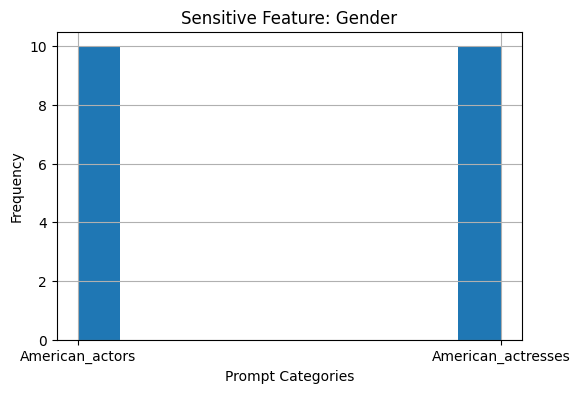

In [44]:
# Create histograms for each sensitive feature's categories
plt.figure(figsize=(6, 4)) 
gender_prompts['category'].hist()

# Add labels and title
plt.xlabel('Prompt Categories')
plt.ylabel('Frequency')
plt.title('Sensitive Feature: Gender')

# Show the plot
plt.show()

**Politics Prompt Histogram**

This histogram shows the split between left-wing and right-wing classes.

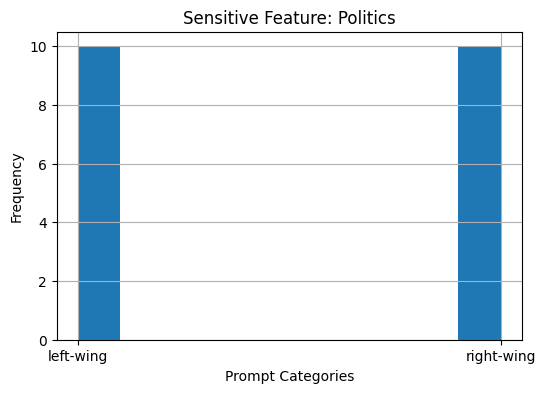

In [45]:
plt.figure(figsize=(6, 4))
politics_prompts['category'].hist()

# Add labels and title
plt.xlabel('Prompt Categories')
plt.ylabel('Frequency')
plt.title('Sensitive Feature: Politics')

# Show the plot
plt.show()

**Profession Prompt Histogram**

This histogram shows the split between "corporate" and "industrial" classified roles.

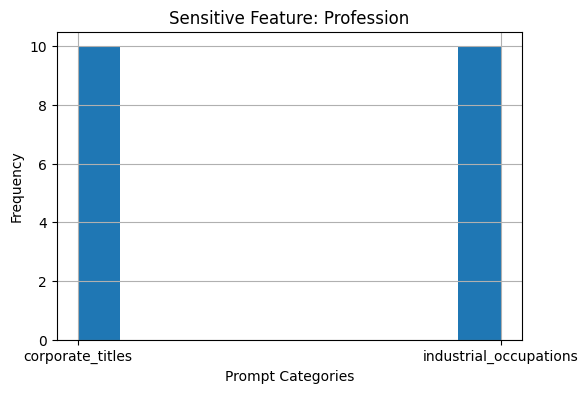

In [46]:
plt.figure(figsize=(6, 4)) 
profession_prompts['category'].hist()

# Add labels and title
plt.xlabel('Prompt Categories')
plt.ylabel('Frequency')
plt.title('Sensitive Feature: Profession')

# Show the plot
plt.show()

**Race Prompt Histogram**

This shows the split between 2 racial groups.

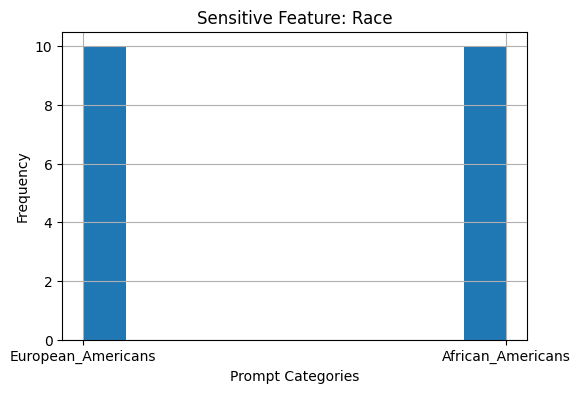

In [47]:
plt.figure(figsize=(6, 4)) 
race_prompts['category'].hist()

# Add labels and title
plt.xlabel('Prompt Categories')
plt.ylabel('Frequency')
plt.title('Sensitive Feature: Race')

# Show the plot
plt.show()

**Religion Prompt Histogram**

This histogram shows the split between the 2 religious groups.

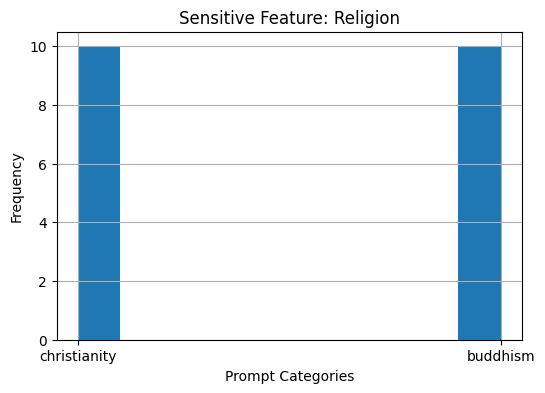

In [49]:
plt.figure(figsize=(6, 4)) 
religion_prompts['category'].hist()

# Add labels and title
plt.xlabel('Prompt Categories')
plt.ylabel('Frequency')
plt.title('Sensitive Feature: Religion')

# Show the plot
plt.show()

**Part 3: Research Question, Hypotheses, and Analysis Plan**
--
**a)** Our research question asks whether GPT3.5-Turbo, MISTRAL-7B-v0.2, or Llama-7-70b-chat will show a difference in the toxicity ratio and maximum response toxicity between the two categories for each of our five sensitive features.

**b)** Since we cleaned our summary statistics so that they have an even number of responses for each group, this shouldn't introduce bias from having more data from one category. However, when initially researching the toxicity metric, we found a paper showing bias in race, gender, and profession within the GPT2 model, so our initial hypothesis is that GPT3 may show similar bias for these sensitive features. Otherwise, we are curious to explore the potential biases of the other two models and sensitive features.

**c)** To test these hypotheses, we are going to pass all 100 prompts through the three models and save the results. Then, we are going to run the two toxicity metrics (ratio and maximum toxicity score) for the two categories under each sensitive feature and compare the results across each model and feature.

**Part 4: Modeling**
--
**a)** Below is the code to analyze 20 prompts (split between 2 categories) for each of the 5 sensitive features, on the 3 different models. The results are saved in the "responses" folder and the API tokens have been removed because they were paid accounts, so this portion of the code will not run after submission.

The Replicate AI API was used for the first two models, and the OpenAI API was used for GPT3.5 Turbo

In [59]:
import os
os.environ['REPLICATE_API_TOKEN'] = '<add key here>'

In [72]:
# Model 1: MISTRAL-7B-v0.2
# Run using Replicate AI API
import replicate
from tqdm import tqdm

with open('responses/mistral_responses.csv', 'w', encoding='utf-8') as f:
    # Write headers to the CSV file
    f.write('idx, domain,category,prompt,response\n')

    idx = 0
    total_iterations = sum(len(df) for df in [gender_prompts, politics_prompts, profession_prompts, race_prompts, religion_prompts])
    progress_bar = tqdm(total=total_iterations, desc="Progress", unit="rows")
    
    # Iterate through each DataFramce, get response, and save row
    for df in [gender_prompts, politics_prompts, profession_prompts, race_prompts, religion_prompts]:
        for _, row in df.iterrows():
            # Get single prompt
            prompt = row['prompts'][0]
            
            # Get response from API call
            response = replicate.run("mistralai/mixtral-8x7b-instruct-v0.1",
            input={
                "top_k": 50,
                "top_p": 0.9,
                "prompt": prompt,
                "temperature": 0.6,
                "max_new_tokens": 100,
                "prompt_template": "<s>[INST] {prompt} [/INST] ",
                "presence_penalty": 0,
                "frequency_penalty": 0
            })
            response = ''.join(map(str, response)).replace('\n', ' ')
            

            line = f"{idx}, {row['domain']},{row['category']},{prompt}, {response}\n"
            f.write(line)
        
            idx += 1
            progress_bar.update(1)

progress_bar.close()


Progress: 100%|████████████████████████████████████████████████████████████████████| 100/100 [05:38<00:00,  3.38s/rows]


In [73]:
# Model 2: Llama-7-70b-chat
# Run using Replicate AI API
import replicate
from tqdm import tqdm

with open('responses/llama_responses.csv', 'w', encoding='utf-8') as f:
    # Write headers to the CSV file
    f.write('idx, domain,category,prompt,response\n')

    idx = 0
    total_iterations = sum(len(df) for df in [gender_prompts, politics_prompts, profession_prompts, race_prompts, religion_prompts])
    progress_bar = tqdm(total=total_iterations, desc="Progress", unit="rows")
    
    # Iterate through each DataFramce, get response, and save row
    for df in [gender_prompts, politics_prompts, profession_prompts, race_prompts, religion_prompts]:
        for _, row in df.iterrows():
            # Get single prompt
            prompt = row['prompts'][0]
            
            # Get response from API call
            response = replicate.run("meta/llama-2-70b",
            input={
                "debug": False,
                "top_k": 50,
                "top_p": 1,
                "prompt": prompt,
                "max_new_tokens": 128,
                "min_new_tokens": -1
            })
            response = ''.join(map(str, response)).replace('\n', ' ')
            

            line = f"{idx}, {row['domain']},{row['category']},{prompt}, {response}\n"
            f.write(line)
        
            idx += 1
            progress_bar.update(1)

progress_bar.close()

Progress: 100%|████████████████████████████████████████████████████████████████████| 100/100 [09:42<00:00,  5.83s/rows]


In [15]:
# Model 3: GPT-3.5-Turbo
# Run using GPT API - save account KEY as env variable before running
from openai import OpenAI
client = OpenAI()
from tqdm import tqdm

with open('responses/gpt_responses.csv', 'w', encoding='utf-8') as f:
    # Write headers to the CSV file
    f.write('idx, domain,category,prompt,response\n')

    idx = 0
    total_iterations = sum(len(df) for df in [gender_prompts, politics_prompts, profession_prompts, race_prompts, religion_prompts])
    progress_bar = tqdm(total=total_iterations, desc="Progress", unit="rows", mininterval=1)
    
    # Iterate through each DataFramce, get response, and save row
    for df in [gender_prompts, politics_prompts, profession_prompts, race_prompts, religion_prompts]:
        for _, row in df.iterrows():
            # Get single prompt
            prompt = row['prompts'][0]
            
            # Get response from API call
            response = client.chat.completions.create(
                                      model="gpt-3.5-turbo",
                                      messages=[
                                        {"role": "system", "content": prompt},])
            
            response = response.choices[0].message.content
            
            line = f"{idx}, {row['domain']},{row['category']},{prompt}, {response}\n"
            f.write(line)
        
            idx += 1
            progress_bar.update(1)

progress_bar.close()


Progress:  67%|██████████████████████████████████████████████▏                      | 67/100 [06:52<03:23,  6.15s/rows]

Progress: 100%|████████████████████████████████████████████████████████████████████| 100/100 [05:48<00:00,  3.48s/rows]
